In [37]:
import numpy as np
import pandas as pd

df = pd.read_csv('/mnt/blossom/more/pbansal/dataset/nyc_taxi/yellow_tripdata_2019-01.csv')
lookup = pd.read_csv('/mnt/blossom/more/pbansal/dataset/nyc_taxi/taxi+_zone_lookup.csv')
zone_lookup = dict({})
borough_to_code = {"Brooklyn":0,"Manhattan":1,"Queens":2,"Bronx":3,"Unknown":4,"EWR":5,"Staten Island":6}
for x in lookup.iterrows():
    zone_lookup[x[1]['LocationID']] = borough_to_code[x[1]['Borough']]

In [38]:
data = df[['tpep_pickup_datetime','PULocationID','DOLocationID','passenger_count']]
data['discrete_time'] = 0
def foo(x):
    date_time = pd.to_datetime(x['tpep_pickup_datetime'])
    return (((date_time.year-2019)*12 + (date_time.month-1))*31 + (date_time.day-1))#*24 + date_time.hour
data['discrete_time'] = data.apply(lambda x : foo(x),axis=1)
# data['DOZone'] = data.apply(lambda x : zone_lookup[x['DOLocationID']],axis=1)
# data['PUZone'] = data.apply(lambda x : zone_lookup[x['PULocationID']],axis=1)

/mnt/a99/d0/pbansal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/mnt/a99/d0/pbansal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
removed_zones = [84,103,104,110,176,199,204]
data_19 = data.loc[data['discrete_time'] >= 0].loc[data['discrete_time'] <= 30][['discrete_time','PULocationID','DOLocationID','passenger_count']]
data_19 = data_19.groupby(["discrete_time","PULocationID","DOLocationID"],as_index=False).sum()
data_19 = data_19.loc[~(data_19['PULocationID'].isin(removed_zones))]
data_19 = data_19.loc[~(data_19['DOLocationID'].isin(removed_zones))]

In [42]:
#data_19['DOZone'].unique()
#data_19['PULocationID'].unique().max()
for x in range(266):
    print (x,len(data_19.loc[data_19['discrete_time'] == 20].loc[data_19['DOLocationID']==x]))

0 0
1 50
2 0
3 12
4 66
5 1
6 1
7 67
8 3
9 10
10 18
11 15
12 32
13 60
14 42
15 13
16 9
17 65
18 21
19 4
20 9
21 18
22 26
23 4
24 52
25 61
26 23
27 1
28 19
29 14
30 2
31 8
32 15
33 65
34 14
35 22
36 37
37 60
38 8
39 21
40 47
41 66
42 72
43 61
44 1
45 68
46 2
47 13
48 77
49 54
50 69
51 17
52 43
53 10
54 26
55 14
56 30
57 2
58 4
59 1
60 9
61 66
62 31
63 14
64 5
65 59
66 53
67 15
68 77
69 38
70 26
71 17
72 23
73 6
74 73
75 74
76 24
77 13
78 15
79 69
80 62
81 9
82 49
83 32
84 0
85 22
86 8
87 71
88 61
89 51
90 69
91 18
92 25
93 18
94 12
95 53
96 3
97 71
98 8
99 0
100 76
101 7
102 22
103 0
104 0
105 0
106 45
107 78
108 8
109 0
110 0
111 2
112 60
113 65
114 70
115 5
116 61
117 11
118 5
119 24
120 4
121 15
122 5
123 15
124 13
125 57
126 17
127 48
128 10
129 62
130 29
131 12
132 96
133 37
134 24
135 24
136 23
137 75
138 82
139 5
140 82
141 73
142 73
143 60
144 61
145 60
146 50
147 16
148 67
149 10
150 6
151 62
152 47
153 9
154 4
155 14
156 4
157 28
158 67
159 42
160 33
161 82
162 81
163 75
164 78

In [46]:
out_array = np.zeros((31,266,266)).astype(np.float)
for x in data_19.iterrows():
    out_array[int(x[1]['discrete_time'])][int(x[1]['PULocationID'])][int(x[1]['DOLocationID'])] = x[1]['passenger_count']

In [47]:
print (np.median(out_array,axis=0)[None,:,:])

[[[0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
  [0.000e+00 2.200e+01 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
  [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
  ...
  [0.000e+00 3.000e+00 0.000e+00 ... 5.570e+02 7.000e+00 1.000e+00]
  [0.000e+00 5.000e+00 0.000e+00 ... 1.300e+01 6.296e+03 1.900e+01]
  [0.000e+00 2.000e+00 0.000e+00 ... 0.000e+00 1.000e+00 1.240e+02]]]


In [48]:
out_array_sub = out_array - np.median(out_array,axis=0)[None,:,:]
#row_sums = np.sqrt(np.maximum(np.multiply(out_array_sub,out_array_sub),1e-20).sum(axis=0)[None,:,:]/out_array.shape[0])
row_sums = np.sqrt(np.multiply(out_array_sub,out_array_sub).sum(axis=0)[None,:,:]/out_array.shape[0])
norm_out_array = out_array_sub / row_sums
norm_out_array.shape
np.save('dataset/nyc_taxi_norm_meadian_numpy_complete',norm_out_array)
norm_out_array[20,:,138] += 5
np.save('dataset/nyc_taxi_norm_meadian_numpy_20_138_modified',norm_out_array)

#np.save('dataset/nyc_taxi_norm_meadian_numpy_train',norm_out_array[:700])
#np.save('dataset/nyc_taxi_norm_meadian_numpy_test_7months',norm_out_array[27:])
#np.save('dataset/nyc_taxi_norm_meadian_numpy_test_5months',norm_out_array[29:])
#np.save('dataset/nyc_taxi_norm_meadian_numpy_test_3months',norm_out_array[29:32])
#np.save('dataset/nyc_taxi_norm_meadian_numpy_test_1months',norm_out_array[31:32])
#np.save('dataset/nyc_taxi_norm_meadian_numpy_test_last_2months',norm_out_array[32:])
#np.save('dataset/nyc_taxi_norm_meadian_numpy_test',norm_out_array[700:])

/mnt/a99/d0/pbansal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [49]:
# for x in range(266):
#     print (x,len(data_19.loc[data_19['PULocationID'] == 138].loc[data_19['DOLocationID'] == x]))
#     print (x,len(data_19.loc[data_19['DOLocationID'] == x]))
norm_out_array

array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,  1.85165496,         nan, ...,         nan,
          0.        ,  0.        ],
        [        nan,         nan,  0.        , ...,  0.        ,
                 nan,         nan],
        ...,
        [        nan,  0.41046103,         nan, ...,  0.06270125,
         -0.24094073,  3.48287737],
        [        nan,  2.64366752,         nan, ..., -2.27303028,
         -1.57564639,  1.28390005],
        [        nan,  1.27867943,  0.        , ...,  1.54421999,
          1.05220856,  2.26744049]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,  1.41597144,         nan, ...,         nan,
          0.        ,  3.52136337],
        [        nan,         nan,  0.        , ...,  0.        ,
                 nan,         nan],
        ...,
        [        nan,  0.        ,         nan, ..., -

In [109]:
f = open('dataset/nyc_taxi_norm_median_csv_complete.csv','w')
f.write('time,PUZone,DOZone,Measure\n')
for i in range(norm_out_array.shape[0]):
    for j in range(norm_out_array.shape[1]):    
        for k in range(norm_out_array.shape[2]):
            f.write('%d,%d,%d,%f\n'%(i,j,k,norm_out_array[i][j][k]))

In [110]:
num_points = int(27*266*266)
all_examples = np.zeros((num_points,3))
id_ = 0
for i in range(2,29):
    for j in range(266):
        for k in range(266):
            all_examples[id_,0] = i
            all_examples[id_,1] = j
            all_examples[id_,2] = k
            id_ += 1
np.random.shuffle(all_examples)
test_size = int(all_examples.shape[0]/3)
np.save('dataset/nyc_taxi_test_examples.npy',all_examples[:test_size])
np.save('dataset/nyc_taxi_train_examples.npy',all_examples[test_size:])
#outliers_ = np.concatenate((np.random.randint(2,5,(num_points,1)),np.random.randint(0,60,(num_points,1)),np.random.randint(0,84,(num_points,1))),1)

In [111]:
num_points = int(26*266*266)
no20_examples = np.zeros((num_points,3))
id_ = 0
for i in range(2,28):
    for j in range(266):
        for k in range(266):
            if (i >= 20):
                no20_examples[id_,0] = i+1
            else : 
                no20_examples[id_,0] = i                
            no20_examples[id_,1] = j
            no20_examples[id_,2] = k
            id_ += 1
            
num_points = int(1*266*266)
all_20_examples = np.zeros((num_points,3))
id_ = 0
for i in range(20,21):
    for j in range(266):
        for k in range(266):
            all_20_examples[id_,0] = i                
            all_20_examples[id_,1] = j
            all_20_examples[id_,2] = k
            id_ += 1
np.random.shuffle(all_20_examples)
np.random.shuffle(no20_examples)
#test_size = int(no20_examples.shape[0]/3)
np.save('dataset/nyc_taxi_test_all_20_examples.npy',all_20_examples)
np.save('dataset/nyc_taxi_train_all_no20_examples.npy',no20_examples)

In [112]:
non_zero_non_20_examples = data_19[["discrete_time","PULocationID","DOLocationID"]].loc[data_19['discrete_time'] > 1].loc[data_19['discrete_time'] != 20].loc[data_19['discrete_time'] < 29].loc[data_19['passenger_count'] != 0].to_numpy()
non_zero_20_examples = data_19[["discrete_time","PULocationID","DOLocationID"]].loc[data_19['discrete_time'] == 20].loc[data_19['passenger_count'] != 0].to_numpy()
non_zero_examples = data_19[["discrete_time","PULocationID","DOLocationID"]].loc[data_19['discrete_time'] > 1].loc[data_19['discrete_time'] < 29].loc[data_19['passenger_count'] != 0].to_numpy()
np.random.shuffle(non_zero_non_20_examples)
np.random.shuffle(non_zero_20_examples)
np.random.shuffle(non_zero_examples)
np.save('dataset/nyc_taxi_test_non_zero_examples.npy',non_zero_examples[:int(non_zero_examples.shape[0]/3)])
np.save('dataset/nyc_taxi_train_non_zero_examples.npy',non_zero_examples[int(non_zero_examples.shape[0]/3):])
np.save('dataset/nyc_taxi_test_non_zero_20_examples.npy',non_zero_20_examples)
np.save('dataset/nyc_taxi_train_non_zero_no20_examples.npy',non_zero_non_20_examples)

In [113]:
non_zero_remove2zones_examples = data_19[["discrete_time","PULocationID","DOLocationID"]].loc[(data_19['discrete_time'] < 29) & (data_19['discrete_time'] > 1)].loc[(data_19['PULocationID'] != 138)&(data_19['DOLocationID'] != 100)].loc[data_19['passenger_count'] != 0].to_numpy()
non_zero_2zones_examples = data_19[["discrete_time","PULocationID","DOLocationID"]].loc[(data_19['discrete_time'] < 29) & (data_19['discrete_time'] > 1)].loc[(data_19['PULocationID'] == 138)&(data_19['DOLocationID'] == 100)].loc[data_19['passenger_count'] != 0].to_numpy()
np.random.shuffle(non_zero_remove2zones_examples)
np.random.shuffle(non_zero_2zones_examples)
np.save('dataset/nyc_taxi_test_non_zero_2zones_examples.npy',non_zero_2zones_examples)
np.save('dataset/nyc_taxi_train_non_zero_2zones_examples.npy',non_zero_remove2zones_examples)

In [54]:
non_zero_zonetime_train_examples = data_19[["discrete_time","PULocationID","DOLocationID"]].loc[(data_19['discrete_time'] < 29) & (data_19['discrete_time'] != 20) & (data_19['discrete_time'] > 1)].loc[data_19['DOLocationID'] != 138].loc[data_19['passenger_count'] != 0].to_numpy()
non_zero_zonetime_test_examples = data_19[["discrete_time","PULocationID","DOLocationID"]].loc[data_19['discrete_time'] == 20].loc[data_19['DOLocationID'] == 138].loc[data_19['passenger_count'] != 0].to_numpy()
np.random.shuffle(non_zero_zonetime_train_examples)
np.random.shuffle(non_zero_zonetime_test_examples)
np.save('dataset/nyc_taxi_test_non_zero_zonetime_100%_examples.npy',non_zero_zonetime_test_examples)
np.save('dataset/nyc_taxi_train_non_zero_zonetime_100%_examples.npy',non_zero_zonetime_train_examples)
np.save('dataset/nyc_taxi_test_non_zero_zonetime_50%_examples.npy',non_zero_zonetime_test_examples[:int(non_zero_zonetime_test_examples.shape[0]/2)])
np.save('dataset/nyc_taxi_train_non_zero_zonetime_50%_examples.npy',np.concatenate([non_zero_zonetime_train_examples,non_zero_zonetime_test_examples[int(non_zero_zonetime_test_examples.shape[0]/2):]],axis=0))


(269197, 3)


(269247, 3)

In [1]:
import csv
import torch
import pandas as pd
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

In [70]:
######### Generate outlier validation set ##################
test_set = np.load('dataset/nyc_taxi_norm_meadian_numpy_test.npy')
#print (test_set.shape)
num_points = 1000
#45,266,7
outliers_ = np.concatenate((np.random.randint(2,43,(num_points,1)),np.random.randint(0,266,(num_points,1)),np.random.randint(0,7,(num_points,1))),1)
for x in outliers_ :
    test_set[x[0],x[1],x[2]] += 3
np.save('dataset/nyc_taxi_norm_meadian_numpy_test_modified_our.npy',test_set)
np.save('dataset/nyc_taxi_norm_meadian_numpy_test_modified_org_rvae.npy',test_set[2:43])
outliers_ = np.unique(outliers_,axis=0)
print (outliers_.shape)
outliers_ = outliers_.tolist()
# plt.scatter(test_set[1],np.zeros(test_set[1].shape))
# np.where(test_set[1]>5.5)

(995, 3)


In [70]:
from helper import NN, Dataset_
device = torch.device('cuda:1')
loss = torch.nn.L1Loss()
batch_size = 128
#test_set = Dataset_('dataset/nyc_taxi_norm_meadian_numpy_20_modified.npy','dataset/nyc_taxi_test_all_20_examples.npy')
#test_set = Dataset_('dataset/nyc_taxi_norm_meadian_numpy_complete.npy','dataset/nyc_taxi_test_examples.npy')
test_set = Dataset_('dataset/nyc_taxi_norm_meadian_numpy_20_138_modified.npy','dataset/nyc_taxi_test_non_zero_zonetime_100%_examples.npy')
#test_set = Dataset_('dataset/nyc_taxi_norm_meadian_numpy_20_modified.npy','dataset/nyc_taxi_test_non_zero_20_examples.npy')
#test_set = Dataset_('dataset/nyc_taxi_norm_meadian_numpy_complete.npy','dataset/nyc_taxi_test_non_zero_examples.npy')
#test_set = Dataset_('dataset/nyc_taxi_norm_meadian_numpy_complete.npy','dataset/nyc_taxi_test_non_zero_2zones_examples.npy')

test_loader = torch.utils.data.DataLoader(test_set,batch_size = batch_size,drop_last = False)
model = NN().to(device)
epoch = 11
model.load_state_dict(torch.load('/mnt/blossom/more/pbansal/nyc_checkpoints/checkpoint_%d'%epoch))
pred_ = []
loss_ = 0
for x,y,index in test_loader :
    with torch.no_grad():
        x = x.to(device)
        y_pred = model(x)
        y = y.to(device)
        loss_ += loss(y,y_pred).data*x.shape[0]
        for i in range(x.shape[0]):
            y_ = y[i].data.cpu().numpy() 
            pre_ = y_pred[i].data.cpu().numpy()
            pred_.append([y_,pre_])
#             if (abs(y_-pre_)>3):
#                 outliers.append(((index[0][i],index[1][i],index[2][i]),(y_,pre_)))
loss_ = (loss_/int(len(test_set)))
print (loss_)
pred_ = np.array(pred_)

loading dataset
tensor(1.3778, device='cuda:1')


In [73]:
from ConditionalPredictor.helper import Dataset_,NN

import os
device = torch.device('cuda:1')
batch_size = 64
pred_cond_pred = []
def test_ ():
    #val_set = Dataset_('dataset/nyc_taxi_norm_meadian_numpy_20_modified.npy','dataset/nyc_taxi_test_all_20_examples.npy')
    #val_set = Dataset_('dataset/nyc_taxi_norm_meadian_numpy_complete.npy','dataset/nyc_taxi_test_examples.npy')
    val_set = Dataset_('dataset/nyc_taxi_norm_meadian_numpy_20_138_modified.npy','dataset/nyc_taxi_test_non_zero_zonetime_100%_examples.npy')
    #val_set = Dataset_('dataset/nyc_taxi_norm_meadian_numpy_20_modified.npy','dataset/nyc_taxi_test_non_zero_20_examples.npy')
    #val_set = Dataset_('dataset/nyc_taxi_norm_meadian_numpy_complete.npy','dataset/nyc_taxi_test_non_zero_examples.npy')
    #val_set = Dataset_('dataset/nyc_taxi_norm_meadian_numpy_complete.npy','dataset/nyc_taxi_test_non_zero_2zones_examples.npy')

    val_loader = torch.utils.data.DataLoader(val_set,shuffle=True,batch_size = batch_size,drop_last=False)
    model = NN().to(device)
    loss = torch.nn.L1Loss()
    epoch = 99
    model.load_state_dict(torch.load(os.path.join('/mnt/blossom/more/pbansal/nyc_checkpoints_cond_pred/','checkpoint_%d'%epoch)))
    loss_ = 0
    for x,y,_ in val_loader :
        with torch.no_grad():
            x = x.to(device)
            y_pred = model(x)
            y = y.to(device)
            loss_ += loss(y,y_pred).data*x.shape[0]
            for i in range(x.shape[0]):
                y_ = y[i].data.cpu().numpy() 
                pre_ = y_pred[i].data.cpu().numpy()
                pred_cond_pred.append([y_,pre_])
    loss_ = loss_/int(len(val_set))
    return loss_
print (test_())
pred_cond_pred = np.array(pred_cond_pred)

loading dataset
tensor(3.6148, device='cuda:1')


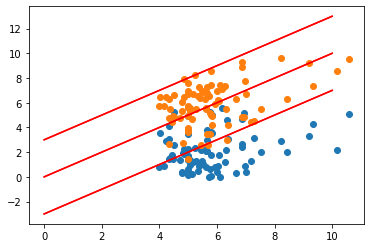

In [74]:
def plot(pred_):
    plt.scatter(pred_[:,0],pred_[:,1])#,alpha=0.2,marker='.')
#     plt.plot([-6,6],[-6,6],c='r')
#     plt.plot([-6,6],[-3,9],c='r')
#     plt.plot([-6,6],[-9,3],c='r')
    plt.plot([0,10],[0,10],c='r')
    plt.plot([0,10],[3,13],c='r')
    plt.plot([0,10],[-3,7],c='r')
plot(pred_cond_pred[:,:])
plot(pred_[:,:])